READING FITS IMAGES

In [36]:
from astropy.io import fits
#fits_path ='D:\MHRS_LAB_7\tycho'
hdulist = fits.open(r'D:\MHRS_LAB_7\tycho\tycho_950-1260eV.fits')

data = hdulist[0].data
hdulist.close()

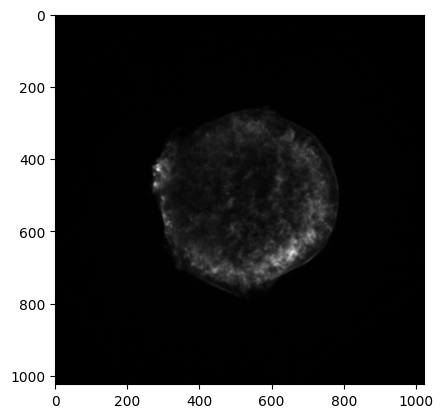

In [37]:
import matplotlib.pyplot as plt
plt.imshow(data, cmap='gray')
plt.show()
header = hdulist[0].header

In [38]:
print(header)

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 1024 / length of data axis                            NAXIS2  =                 1024 / length of data axis                            EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H HDUNAME = 'CONVOLVE'           / ASCDM block name                               COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyMETHOD  = 'fft     '                                                            PAD     =                    F / pad to power of 2**n                           KERNELSP= 'lib:gaus(2,5,1,1.5,1.5)' / co

APPLYING EQUALIZER

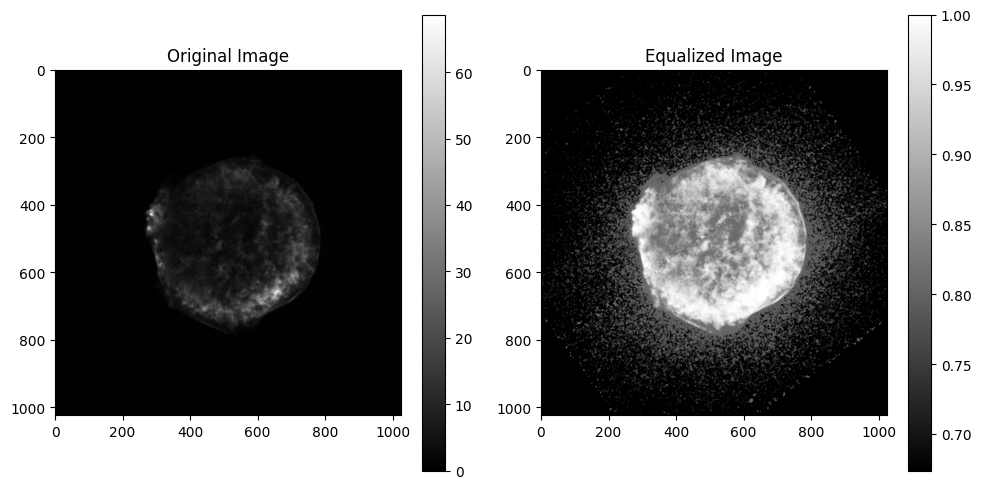

In [39]:
from astropy.io import fits
import matplotlib.pyplot as plt
from skimage import exposure

hdulist = fits.open(r'D:\MHRS_LAB_7\tycho\tycho_950-1260eV.fits')
data = hdulist[0].data
header = hdulist[0].header
hdulist.close()
data_equalized = exposure.equalize_hist(data)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(data_equalized, cmap='gray')
plt.title('Equalized Image')
plt.colorbar()

plt.tight_layout()
plt.show()

COMPOSITE

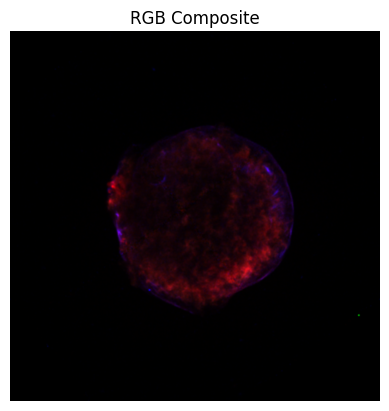

In [40]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

hdulist_red = fits.open(r'D:\MHRS_LAB_7\tycho\tycho_950-1260eV.fits')
hdulist_green = fits.open(r'D:\MHRS_LAB_7\tycho\tycho_1630-2260eV.fits')
hdulist_blue = fits.open(r'D:\MHRS_LAB_7\tycho\tycho_4100-6100eV.fits')

data_red = hdulist_red[0].data
data_green = hdulist_green[0].data
data_blue = hdulist_blue[0].data

hdulist_red.close()
hdulist_green.close()
hdulist_blue.close()
data_red_normalized = (data_red - data_red.min()) / (data_red.max() - data_red.min())
data_green_normalized = (data_green - data_green.min()) / (data_green.max() - data_green.min())
data_blue_normalized = (data_blue - data_blue.min()) / (data_blue.max() - data_blue.min())

rgb_image = np.dstack((data_red_normalized, data_green_normalized, data_blue_normalized))

plt.imshow(rgb_image)
plt.title('RGB Composite')
plt.axis('off')
plt.show()

HISTOGRAM

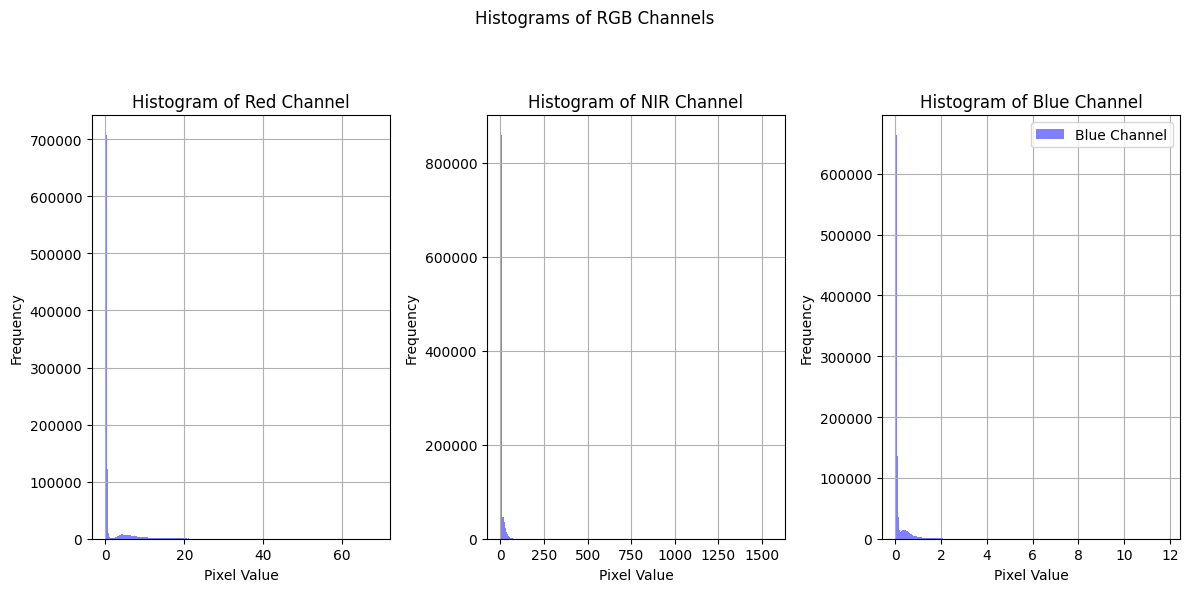

In [42]:
from astropy.io import fits
import matplotlib.pyplot as plt

def plot_histogram(data, label, title):
    plt.hist(data.ravel(), bins=256, color='blue', alpha=0.5, label=label)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(title)  # Add a title to the histogram
    plt.grid(True)

hdulist_red = fits.open(r'D:\MHRS_LAB_7\tycho\tycho_950-1260eV.fits')
hdulist_nir = fits.open(r'D:\MHRS_LAB_7\tycho\tycho_1630-2260eV.fits')
hdulist_blue = fits.open(r'D:\MHRS_LAB_7\tycho\tycho_4100-6100eV.fits')

data_red = hdulist_red[0].data
data_nir = hdulist_nir[0].data
data_blue = hdulist_blue[0].data

plt.figure(figsize=(12, 6))
plt.subplot(131)
plot_histogram(data_red, 'Red Channel', 'Histogram of Red Channel')
plt.subplot(132)
plot_histogram(data_nir,  'NIR Channel', 'Histogram of NIR Channel')
plt.subplot(133)
plot_histogram(data_blue, 'Blue Channel', 'Histogram of Blue Channel')

plt.suptitle('Histograms of RGB Channels', fontsize=12)
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

STATISTICAL DATA

In [43]:
from astropy.io import fits

def compute_statistics(data, channel_name):
    mean_value = np.mean(data)
    median_value = np.median(data)
    
    mode_data = np.round(data).astype(int)
    mode_data = mode_data[mode_data >= 0] 
    if mode_data.size > 0:
        mode_value = float(np.argmax(np.bincount(mode_data.ravel())))
    else:
        mode_value = None
    
    std_deviation = np.std(data) 
    
    print(f"Statistics for {channel_name} Channel:")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Mode: {mode_value}\n")
    print(f"Standard Deviation: {std_deviation:.2f}\n")

hdulist_red = fits.open(r'D:\MHRS_LAB_7\tycho\tycho_950-1260eV.fits')
hdulist_green = fits.open(r'D:\MHRS_LAB_7\tycho\tycho_1630-2260eV.fits')
hdulist_blue = fits.open(r'D:\MHRS_LAB_7\tycho\tycho_4100-6100eV.fits')

data_red = hdulist_red[0].data
data_nir = hdulist_green[0].data
data_blue = hdulist_blue[0].data

hdulist_red.close()
hdulist_green.close()
hdulist_blue.close()

compute_statistics(data_red, 'Red')
compute_statistics(data_nir, 'NIR')
compute_statistics(data_blue, 'Blue')

Statistics for Red Channel:
Mean: 1.79
Median: 0.16
Mode: 0.0

Standard Deviation: 4.31

Statistics for NIR Channel:
Mean: 4.22
Median: 0.19
Mode: 0.0

Standard Deviation: 10.91

Statistics for Blue Channel:
Mean: 0.15
Median: 0.02
Mode: 0.0

Standard Deviation: 0.37

